/var/folders/fn/w8_9ym890lv7z623klj52gqm0000gn/T/ipykernel_5660/4000168851.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  CNNmodel.load_state_dict(torch.load(CNNmodel_

K: Accuracy: 0.5474 | Normalized Brier Score: 3.5070 | Cross-Entropy Loss: 1.5479
Q: Accuracy: 0.5735 | Normalized Brier Score: 3.7960 | Cross-Entropy Loss: 1.5479
R: Accuracy: 0.4996 | Normalized Brier Score: 3.8097 | Cross-Entropy Loss: 1.5479
B: Accuracy: 0.4694 | Normalized Brier Score: 3.7636 | Cross-Entropy Loss: 1.5479
N: Accuracy: 0.5423 | Normalized Brier Score: 3.4844 | Cross-Entropy Loss: 1.5479
P: Accuracy: 0.5754 | Normalized Brier Score: 3.0299 | Cross-Entropy Loss: 1.5479

Total Accuracy: 0.5377
Weighted Accuracy: 0.5377


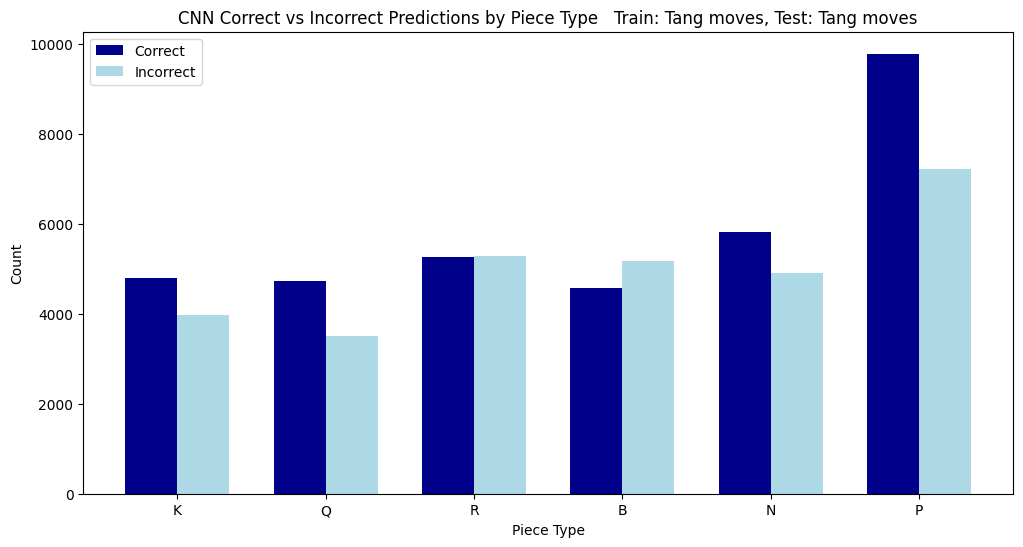


Overall Metrics Summary:
  Piece Type  Accuracy    Recall  F1 Score  Vanilla Brier Score  \
0          K  0.547370  0.547370  0.546405             0.078895   
1          Q  0.573458  0.573458  0.510126             0.080089   
2          R  0.499573  0.499573  0.496000             0.102951   
3          B  0.469423  0.469423  0.496204             0.093963   
4          N  0.542288  0.542288  0.537705             0.095829   
5          P  0.575417  0.575417  0.599357             0.132041   

   Normalized Brier Score  Number of Samples  
0                3.506960               8782  
1                3.796035               8236  
2                3.809721              10549  
3                3.763590               9746  
4                3.484403              10736  
5                3.029878              17012  


In [1]:
import sys
sys.path.append("..")
import torch
import torch.nn as nn
from generating_data.generate_loaders import (
    create_Tang_multi_loaders,
    create_GM_test_multi_loaders
    )
from models.CNNs import flexCNN
from models.MLPs import flexMLP
from testingFunctions import evaluate_per_piece_metrics

CNNmodel = flexCNN(2, 1, [3,3])
CNNmodel_path = '../savedModels/importantModels/movesCNN.pt'
CNNmodel.load_state_dict(torch.load(CNNmodel_path))

MLPmodel = flexMLP(hidden_sizes=[128,64,32], num_affine_layers=3)
MLPmodel_path = '../MLPmodel.pt'
MLPmodel.load_state_dict(torch.load(MLPmodel_path))

Tang_train_loader, Tang_val_loader, Tang_test_loader = create_Tang_multi_loaders('../data/pkl/moves/Tang_moves.pkl')
device = "cpu"

train_name = 'Tang moves'
test_name = 'Tang moves'

df_metrics = evaluate_per_piece_metrics(CNNmodel, Tang_test_loader, 'Tang', device, train_name=train_name, test_name=test_name, model_name='CNN')

100%|██████████| 255/255 [00:06<00:00, 40.85it/s]


K: Accuracy: 0.4383 | Normalized Brier Score: 4.0170 | Cross-Entropy Loss: 1.5697
Q: Accuracy: 0.4554 | Normalized Brier Score: 4.1181 | Cross-Entropy Loss: 1.5697
R: Accuracy: 0.4801 | Normalized Brier Score: 4.1519 | Cross-Entropy Loss: 1.5697
B: Accuracy: 0.4177 | Normalized Brier Score: 4.1384 | Cross-Entropy Loss: 1.5697
N: Accuracy: 0.5170 | Normalized Brier Score: 3.7391 | Cross-Entropy Loss: 1.5697
P: Accuracy: 0.5320 | Normalized Brier Score: 3.3962 | Cross-Entropy Loss: 1.5697

Total Accuracy: 0.4816
Weighted Accuracy: 0.4816


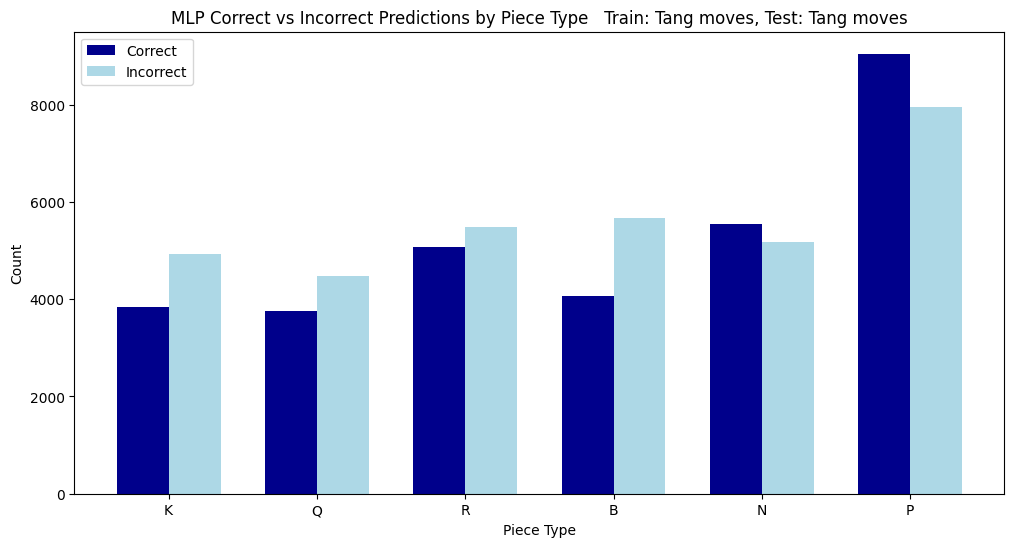


Overall Metrics Summary:
  Piece Type  Accuracy    Recall  F1 Score  Vanilla Brier Score  \
0          K  0.438283  0.438283  0.467424             0.090371   
1          Q  0.455440  0.455440  0.439768             0.086885   
2          R  0.480140  0.480140  0.454709             0.112199   
3          B  0.417710  0.417710  0.432395             0.103320   
4          N  0.516952  0.516952  0.497334             0.102834   
5          P  0.531977  0.531977  0.545723             0.148004   

   Normalized Brier Score  Number of Samples  
0                4.017032               8782  
1                4.118123               8236  
2                4.151924              10549  
3                4.138388               9746  
4                3.739110              10736  
5                3.396179              17012  


In [2]:
df_metrics = evaluate_per_piece_metrics(MLPmodel, Tang_test_loader, 'Tang', device, train_name=train_name, test_name=test_name, model_name='MLP')

100%|██████████| 309/309 [00:08<00:00, 36.29it/s]


K: Accuracy: 0.5280 | Normalized Brier Score: 3.6537 | Cross-Entropy Loss: 1.5805
Q: Accuracy: 0.5501 | Normalized Brier Score: 4.1601 | Cross-Entropy Loss: 1.5805
R: Accuracy: 0.4543 | Normalized Brier Score: 4.0145 | Cross-Entropy Loss: 1.5805
B: Accuracy: 0.4309 | Normalized Brier Score: 4.0858 | Cross-Entropy Loss: 1.5805
N: Accuracy: 0.4794 | Normalized Brier Score: 4.0736 | Cross-Entropy Loss: 1.5805
P: Accuracy: 0.5088 | Normalized Brier Score: 3.4340 | Cross-Entropy Loss: 1.5805

Total Accuracy: 0.4915
Weighted Accuracy: 0.4915


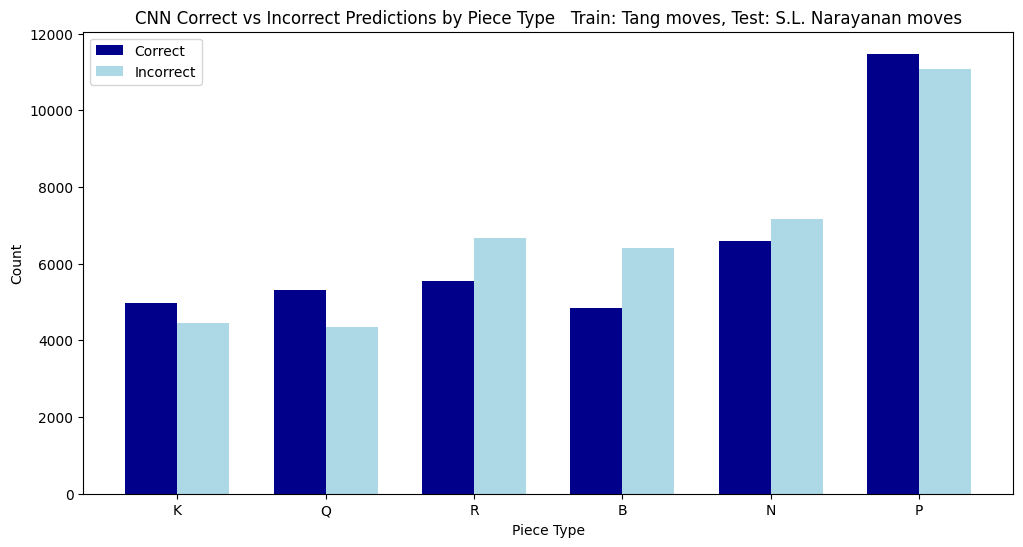


Overall Metrics Summary:
  Piece Type  Accuracy    Recall  F1 Score  Vanilla Brier Score  \
0          K  0.527984  0.527984  0.526171             0.072781   
1          Q  0.550103  0.550103  0.473081             0.085030   
2          R  0.454330  0.454330  0.453035             0.103755   
3          B  0.430880  0.430880  0.452304             0.097167   
4          N  0.479398  0.479398  0.467557             0.118365   
5          P  0.508801  0.508801  0.543976             0.163543   

   Normalized Brier Score  Number of Samples  
0                3.653678               9434  
1                4.160120               9680  
2                4.014538              12240  
3                4.085795              11263  
4                4.073635              13761  
5                3.433980              22555  


100%|██████████| 351/351 [00:09<00:00, 38.02it/s]


K: Accuracy: 0.5406 | Normalized Brier Score: 3.4607 | Cross-Entropy Loss: 1.5747
Q: Accuracy: 0.5874 | Normalized Brier Score: 4.0177 | Cross-Entropy Loss: 1.5747
R: Accuracy: 0.4826 | Normalized Brier Score: 3.8924 | Cross-Entropy Loss: 1.5747
B: Accuracy: 0.4312 | Normalized Brier Score: 4.0353 | Cross-Entropy Loss: 1.5747
N: Accuracy: 0.4765 | Normalized Brier Score: 3.9159 | Cross-Entropy Loss: 1.5747
P: Accuracy: 0.5014 | Normalized Brier Score: 3.6226 | Cross-Entropy Loss: 1.5747

Total Accuracy: 0.4997
Weighted Accuracy: 0.4997


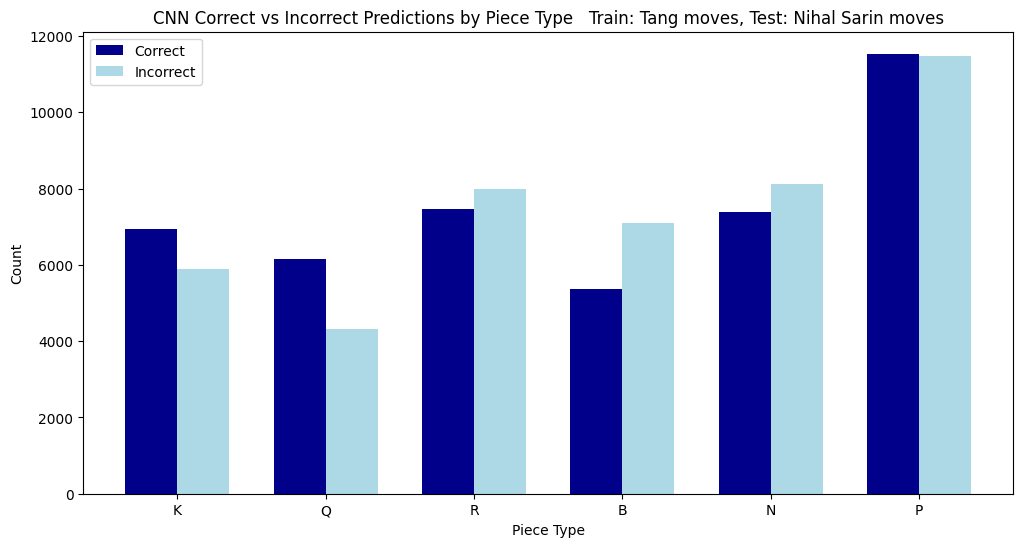


Overall Metrics Summary:
  Piece Type  Accuracy    Recall  F1 Score  Vanilla Brier Score  \
0          K  0.540646  0.540646  0.547329             0.082417   
1          Q  0.587437  0.587437  0.497067             0.078073   
2          R  0.482589  0.482589  0.479825             0.111733   
3          B  0.431163  0.431163  0.456407             0.093396   
4          N  0.476510  0.476510  0.479647             0.112897   
5          P  0.501413  0.501413  0.525240             0.154827   

   Normalized Brier Score  Number of Samples  
0                3.460680              12818  
1                4.017672              10459  
2                3.892401              15450  
3                4.035298              12457  
4                3.915941              15517  
5                3.622636              23003  


100%|██████████| 353/353 [00:09<00:00, 37.66it/s]


K: Accuracy: 0.5859 | Normalized Brier Score: 3.2158 | Cross-Entropy Loss: 1.5526
Q: Accuracy: 0.5849 | Normalized Brier Score: 3.7140 | Cross-Entropy Loss: 1.5526
R: Accuracy: 0.5591 | Normalized Brier Score: 3.6401 | Cross-Entropy Loss: 1.5526
B: Accuracy: 0.4653 | Normalized Brier Score: 4.0387 | Cross-Entropy Loss: 1.5526
N: Accuracy: 0.4994 | Normalized Brier Score: 3.7180 | Cross-Entropy Loss: 1.5526
P: Accuracy: 0.5089 | Normalized Brier Score: 3.5655 | Cross-Entropy Loss: 1.5526

Total Accuracy: 0.5306
Weighted Accuracy: 0.5306


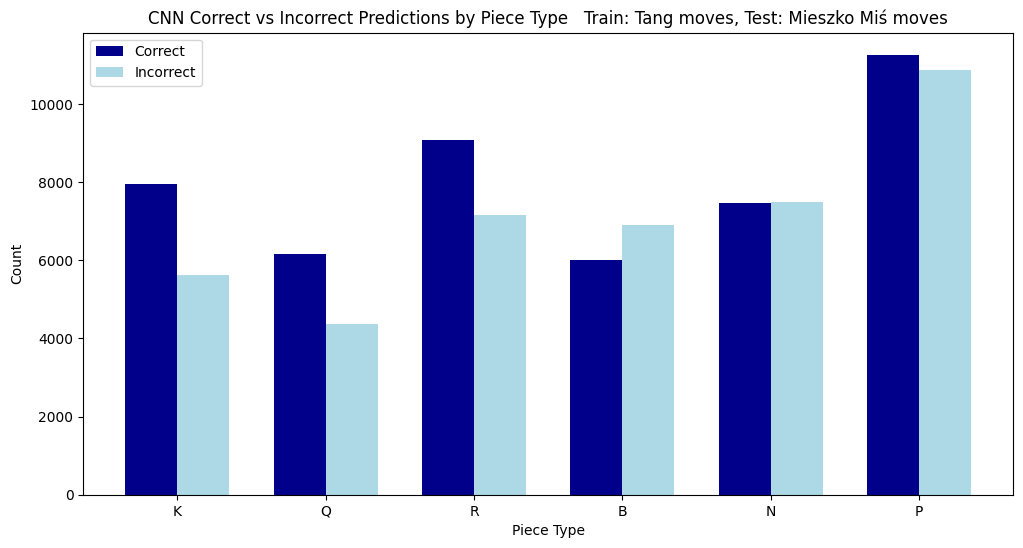


Overall Metrics Summary:
  Piece Type  Accuracy    Recall  F1 Score  Vanilla Brier Score  \
0          K  0.585932  0.585932  0.592088             0.080450   
1          Q  0.584890  0.584890  0.523369             0.072265   
2          R  0.559148  0.559148  0.531041             0.109032   
3          B  0.465253  0.465253  0.483280             0.096260   
4          N  0.499398  0.499398  0.512360             0.102607   
5          P  0.508904  0.508904  0.535480             0.145499   

   Normalized Brier Score  Number of Samples  
0                3.215827              13563  
1                3.713974              10549  
2                3.640124              16239  
3                4.038669              12922  
4                3.718005              14962  
5                3.565494              22124  


100%|██████████| 370/370 [00:09<00:00, 38.37it/s]


K: Accuracy: 0.5954 | Normalized Brier Score: 3.2761 | Cross-Entropy Loss: 1.5660
Q: Accuracy: 0.5896 | Normalized Brier Score: 3.7629 | Cross-Entropy Loss: 1.5660
R: Accuracy: 0.5009 | Normalized Brier Score: 3.8081 | Cross-Entropy Loss: 1.5660
B: Accuracy: 0.4235 | Normalized Brier Score: 3.9172 | Cross-Entropy Loss: 1.5660
N: Accuracy: 0.4694 | Normalized Brier Score: 3.9380 | Cross-Entropy Loss: 1.5660
P: Accuracy: 0.5063 | Normalized Brier Score: 3.6410 | Cross-Entropy Loss: 1.5660

Total Accuracy: 0.5135
Weighted Accuracy: 0.5135


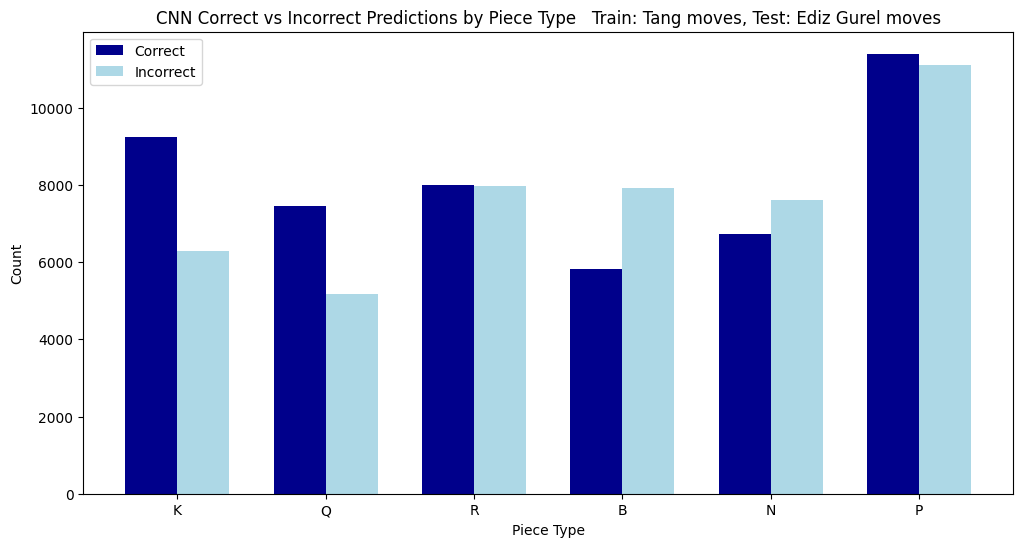


Overall Metrics Summary:
  Piece Type  Accuracy    Recall  F1 Score  Vanilla Brier Score  \
0          K  0.595424  0.595424  0.583428             0.089451   
1          Q  0.589646  0.589646  0.523141             0.083657   
2          R  0.500908  0.500908  0.493979             0.107020   
3          B  0.423545  0.423545  0.462788             0.094628   
4          N  0.469391  0.469391  0.476130             0.099393   
5          P  0.506328  0.506328  0.524543             0.144295   

   Normalized Brier Score  Number of Samples  
0                3.276112              15515  
1                3.762884              12633  
2                3.808122              15969  
3                3.917152              13727  
4                3.937966              14342  
5                3.641044              22519  


100%|██████████| 359/359 [00:09<00:00, 39.11it/s]


K: Accuracy: 0.5949 | Normalized Brier Score: 3.2892 | Cross-Entropy Loss: 1.5694
Q: Accuracy: 0.5665 | Normalized Brier Score: 3.8982 | Cross-Entropy Loss: 1.5694
R: Accuracy: 0.5257 | Normalized Brier Score: 3.7030 | Cross-Entropy Loss: 1.5694
B: Accuracy: 0.4148 | Normalized Brier Score: 4.0003 | Cross-Entropy Loss: 1.5694
N: Accuracy: 0.4598 | Normalized Brier Score: 4.0466 | Cross-Entropy Loss: 1.5694
P: Accuracy: 0.4984 | Normalized Brier Score: 3.6825 | Cross-Entropy Loss: 1.5694

Total Accuracy: 0.5088
Weighted Accuracy: 0.5088


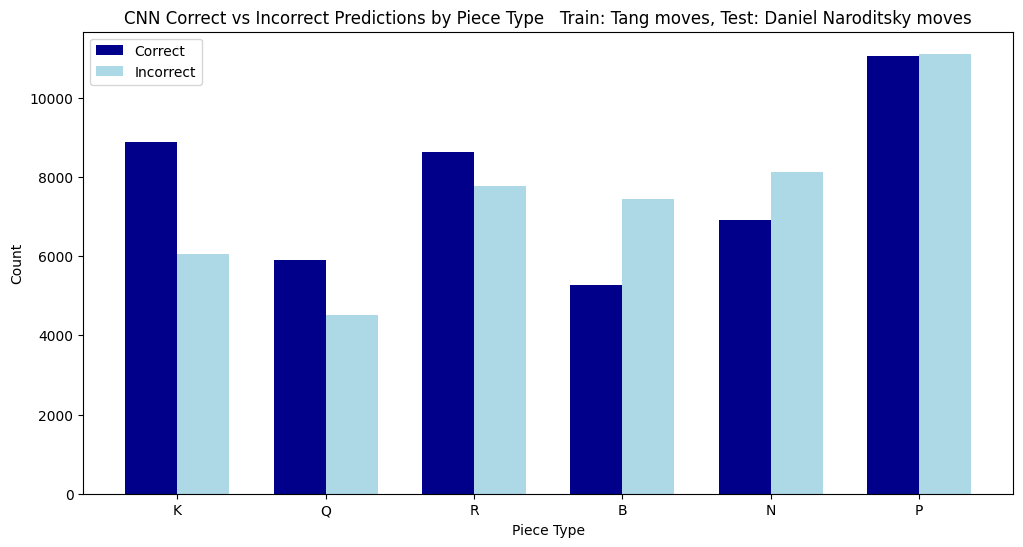


Overall Metrics Summary:
  Piece Type  Accuracy    Recall  F1 Score  Vanilla Brier Score  \
0          K  0.594873  0.594873  0.579816             0.089365   
1          Q  0.566459  0.566459  0.502038             0.073970   
2          R  0.525709  0.525709  0.509668             0.110398   
3          B  0.414826  0.414826  0.454659             0.092536   
4          N  0.459776  0.459776  0.465716             0.110494   
5          P  0.498420  0.498420  0.520439             0.148296   

   Normalized Brier Score  Number of Samples  
0                3.289216              14941  
1                3.898223              10435  
2                3.702980              16395  
3                4.000300              12721  
4                4.046573              15016  
5                3.682457              22146  


100%|██████████| 312/312 [00:08<00:00, 38.75it/s]


K: Accuracy: 0.5415 | Normalized Brier Score: 3.5539 | Cross-Entropy Loss: 1.5777
Q: Accuracy: 0.5806 | Normalized Brier Score: 4.0755 | Cross-Entropy Loss: 1.5777
R: Accuracy: 0.4830 | Normalized Brier Score: 3.8863 | Cross-Entropy Loss: 1.5777
B: Accuracy: 0.4202 | Normalized Brier Score: 4.2143 | Cross-Entropy Loss: 1.5777
N: Accuracy: 0.4889 | Normalized Brier Score: 3.9928 | Cross-Entropy Loss: 1.5777
P: Accuracy: 0.4872 | Normalized Brier Score: 3.5264 | Cross-Entropy Loss: 1.5777

Total Accuracy: 0.4962
Weighted Accuracy: 0.4962


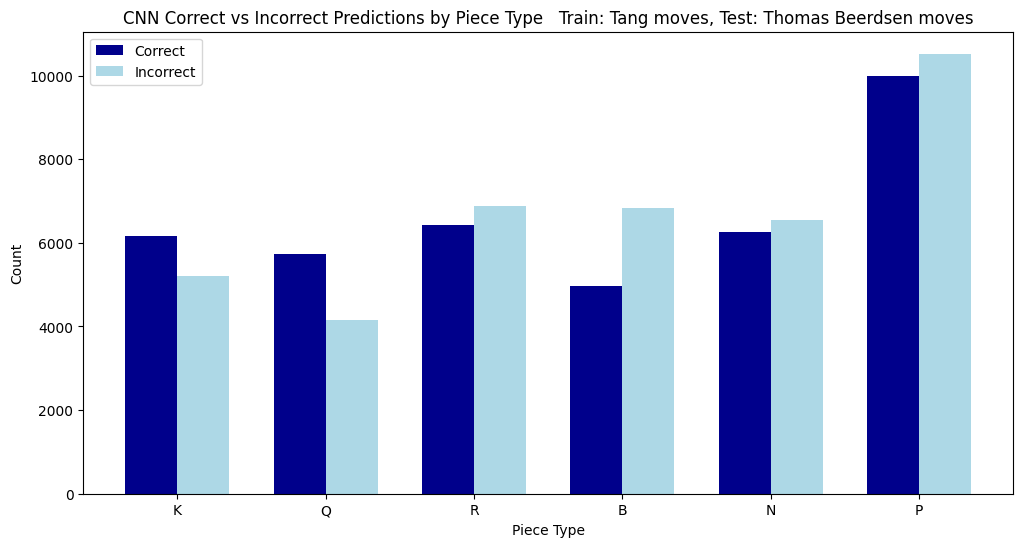


Overall Metrics Summary:
  Piece Type  Accuracy    Recall  F1 Score  Vanilla Brier Score  \
0          K  0.541484  0.541484  0.539516             0.084588   
1          Q  0.580629  0.580629  0.491107             0.084325   
2          R  0.483044  0.483044  0.484081             0.108116   
3          B  0.420156  0.420156  0.437415             0.104007   
4          N  0.488856  0.488856  0.480661             0.106803   
5          P  0.487159  0.487159  0.527477             0.151378   

   Normalized Brier Score  Number of Samples  
0                3.553947              11378  
1                4.075546               9891  
2                3.886327              13299  
3                4.214285              11798  
4                3.992846              12787  
5                3.526397              20521  


100%|██████████| 373/373 [00:09<00:00, 37.57it/s]


K: Accuracy: 0.5692 | Normalized Brier Score: 3.3787 | Cross-Entropy Loss: 1.5772
Q: Accuracy: 0.5491 | Normalized Brier Score: 3.9477 | Cross-Entropy Loss: 1.5772
R: Accuracy: 0.5447 | Normalized Brier Score: 3.6445 | Cross-Entropy Loss: 1.5772
B: Accuracy: 0.4082 | Normalized Brier Score: 4.0661 | Cross-Entropy Loss: 1.5772
N: Accuracy: 0.4552 | Normalized Brier Score: 4.1259 | Cross-Entropy Loss: 1.5772
P: Accuracy: 0.4880 | Normalized Brier Score: 3.8147 | Cross-Entropy Loss: 1.5772

Total Accuracy: 0.5005
Weighted Accuracy: 0.5005


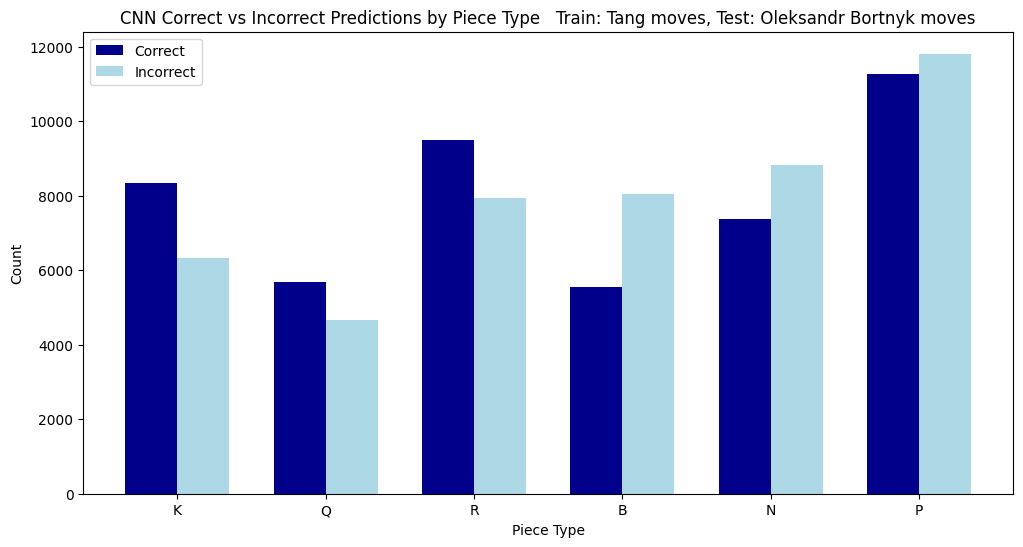


Overall Metrics Summary:
  Piece Type  Accuracy    Recall  F1 Score  Vanilla Brier Score  \
0          K  0.569237  0.569237  0.563417             0.086654   
1          Q  0.549071  0.549071  0.492769             0.071322   
2          R  0.544688  0.544688  0.523112             0.111091   
3          B  0.408213  0.408213  0.445451             0.096790   
4          N  0.455214  0.455214  0.455551             0.116790   
5          P  0.488020  0.488020  0.507845             0.153961   

   Normalized Brier Score  Number of Samples  
0                3.378710              14667  
1                3.947664              10332  
2                3.644473              17432  
3                4.066135              13613  
4                4.125876              16188  
5                3.814701              23081  


100%|██████████| 330/330 [00:08<00:00, 37.26it/s]


K: Accuracy: 0.5578 | Normalized Brier Score: 3.5502 | Cross-Entropy Loss: 1.5811
Q: Accuracy: 0.5604 | Normalized Brier Score: 4.1202 | Cross-Entropy Loss: 1.5811
R: Accuracy: 0.4800 | Normalized Brier Score: 3.9961 | Cross-Entropy Loss: 1.5811
B: Accuracy: 0.4241 | Normalized Brier Score: 4.0979 | Cross-Entropy Loss: 1.5811
N: Accuracy: 0.4903 | Normalized Brier Score: 3.9973 | Cross-Entropy Loss: 1.5811
P: Accuracy: 0.4692 | Normalized Brier Score: 3.5229 | Cross-Entropy Loss: 1.5811

Total Accuracy: 0.4903
Weighted Accuracy: 0.4903


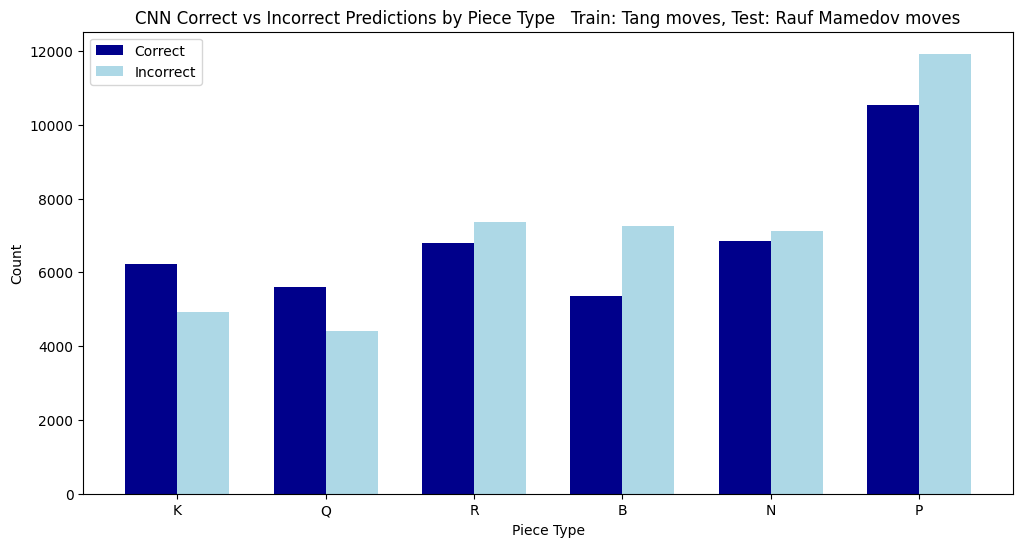


Overall Metrics Summary:
  Piece Type  Accuracy    Recall  F1 Score  Vanilla Brier Score  \
0          K  0.557758  0.557758  0.545502             0.078223   
1          Q  0.560432  0.560432  0.476498             0.081442   
2          R  0.479986  0.479986  0.467392             0.111659   
3          B  0.424050  0.424050  0.448434             0.102089   
4          N  0.490342  0.490342  0.474851             0.110411   
5          P  0.469195  0.469195  0.519212             0.156383   

   Normalized Brier Score  Number of Samples  
0                3.550215              11150  
1                4.120160              10003  
2                3.996129              14140  
3                4.097908              12607  
4                3.997276              13978  
5                3.522877              22464  


100%|██████████| 349/349 [00:09<00:00, 36.29it/s]


K: Accuracy: 0.5565 | Normalized Brier Score: 3.3556 | Cross-Entropy Loss: 1.5780
Q: Accuracy: 0.5352 | Normalized Brier Score: 4.1039 | Cross-Entropy Loss: 1.5780
R: Accuracy: 0.4693 | Normalized Brier Score: 4.0213 | Cross-Entropy Loss: 1.5780
B: Accuracy: 0.4342 | Normalized Brier Score: 3.9763 | Cross-Entropy Loss: 1.5780
N: Accuracy: 0.4356 | Normalized Brier Score: 4.2589 | Cross-Entropy Loss: 1.5780
P: Accuracy: 0.5213 | Normalized Brier Score: 3.6160 | Cross-Entropy Loss: 1.5780

Total Accuracy: 0.4936
Weighted Accuracy: 0.4936


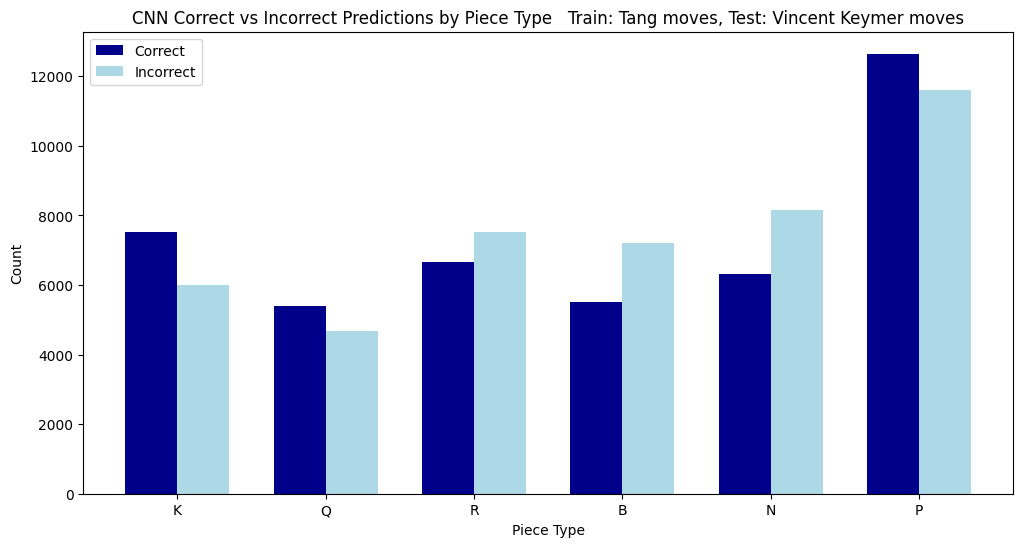


Overall Metrics Summary:
  Piece Type  Accuracy    Recall  F1 Score  Vanilla Brier Score  \
0          K  0.556500  0.556500  0.563285             0.084768   
1          Q  0.535222  0.535222  0.473673             0.077330   
2          R  0.469316  0.469316  0.461768             0.106556   
3          B  0.434222  0.434222  0.461609             0.094405   
4          N  0.435600  0.435600  0.434714             0.115068   
5          P  0.521264  0.521264  0.535736             0.163819   

   Normalized Brier Score  Number of Samples  
0                3.355580              13531  
1                4.103855              10093  
2                4.021336              14193  
3                3.976279              12717  
4                4.258859              14472  
5                3.616034              24266  


100%|██████████| 341/341 [00:09<00:00, 37.45it/s]


K: Accuracy: 0.4999 | Normalized Brier Score: 3.7339 | Cross-Entropy Loss: 1.5829
Q: Accuracy: 0.5613 | Normalized Brier Score: 3.9114 | Cross-Entropy Loss: 1.5829
R: Accuracy: 0.4960 | Normalized Brier Score: 3.8125 | Cross-Entropy Loss: 1.5829
B: Accuracy: 0.4337 | Normalized Brier Score: 4.0405 | Cross-Entropy Loss: 1.5829
N: Accuracy: 0.4472 | Normalized Brier Score: 4.1546 | Cross-Entropy Loss: 1.5829
P: Accuracy: 0.4946 | Normalized Brier Score: 3.6517 | Cross-Entropy Loss: 1.5829

Total Accuracy: 0.4875
Weighted Accuracy: 0.4875


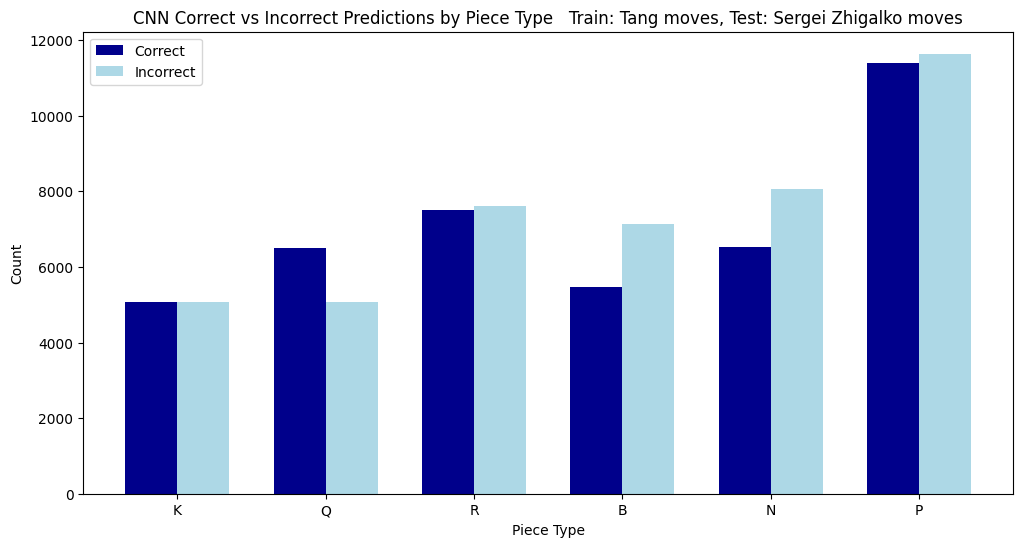


Overall Metrics Summary:
  Piece Type  Accuracy    Recall  F1 Score  Vanilla Brier Score  \
0          K  0.499901  0.499901  0.510666             0.072386   
1          Q  0.561317  0.561317  0.496826             0.086632   
2          R  0.495998  0.495998  0.492884             0.110319   
3          B  0.433677  0.433677  0.454946             0.097604   
4          N  0.447154  0.447154  0.445309             0.116099   
5          P  0.494617  0.494617  0.513671             0.161021   

   Normalized Brier Score  Number of Samples  
0                3.733855              10128  
1                3.911391              11571  
2                3.812512              15117  
3                4.040482              12620  
4                4.154604              14599  
5                3.651748              23036  


In [5]:
players_alias = [
    'wizard98',
    'nihalsarin2004',
    'mishka_the_great',
    'ediz_gurel',
    'rebeccaharris',
    'meneermandje',
    'night-king96',
    'muisback',
    'vincentkeymer2004',
    'zhigalko_sergei'
]

players_list = [
    'S.L. Narayanan',
    'Nihal Sarin',
    'Mieszko Miś',
    'Ediz Gurel',
    'Daniel Naroditsky',
    'Thomas Beerdsen',
    'Oleksandr Bortnyk',
    'Rauf Mamedov',
    'Vincent Keymer',
    'Sergei Zhigalko'
    ]

for alias, player in zip(players_alias, players_list):
    GM_test_loader = create_GM_test_multi_loaders(f'../data/pkl/moves/{alias}_moves.pkl')
    device = "cpu"

    train_name = f'Tang moves'
    test_name = f'{player} moves'

    df_metrics = evaluate_per_piece_metrics(CNNmodel, GM_test_loader, player, device, train_name=train_name, test_name=test_name, model_name='CNN')

In [ ]:
players_alias = [
    'wizard98',
    'nihalsarin2004',
    'mishka_the_great',
    'ediz_gurel',
    'rebeccaharris',
    'meneermandje',
    'night-king96',
    'muisback',
    'vincentkeymer2004',
    'zhigalko_sergei'
]

players_list = [
    'S.L. Narayanan',
    'Nihal Sarin',
    'Mieszko Miś',
    'Ediz Gurel',
    'Daniel Naroditsky',
    'Thomas Beerdsen',
    'Oleksandr Bortnyk',
    'Rauf Mamedov',
    'Vincent Keymer',
    'Sergei Zhigalko'
    ]

for alias, player in zip(players_alias, players_list):
    GM_test_loader = create_GM_test_multi_loaders(f'../data/pkl/moves/{alias}_moves.pkl')
    device = "cpu"

    train_name = f'Tang moves'
    test_name = f'{player} moves'

    df_metrics = evaluate_per_piece_metrics(MLPmodel, GM_test_loader, player, device, train_name=train_name, test_name=test_name, model_name='MLP')